In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
# scikit-learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import datasets, linear_model, preprocessing, neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

In [2]:
# load data
df= pd.read_csv('all_dataset_no_encoding.csv', engine='python')

In [3]:
df.head(5)

,Unnamed: 0,城市代碼,交易標的,都市土地使用分區,交易年月,移轉層次,總樓層數,建物型態,主要用途,主要建材,有無管理組織,建物移轉總面積坪,每坪價格,土地,建物,車位,屋齡,房間數
0,0,A,房地(土地+建物),商,10503,七層,三十三層,住宅大樓(11層含以上有電梯),住家用,鋼骨鋼筋混凝土造,有,34.932700,64.695829,1,1,0,1,2
1,1,A,房地(土地+建物),住,10503,二層,十層,套房(1房1廳1衛),住家用,鋼筋混凝土造,有,12.405525,48.365547,1,1,0,8,1
2,2,A,房地(土地+建物)+車位,住,10503,九層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,有,66.271700,44.061040,3,1,1,5,3
3,3,A,房地(土地+建物)+車位,住,10504,四層,五層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,有,69.039575,50.695561,1,1,1,7,4
4,4,A,房地(土地+建物),住,10503,九層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,有,24.293775,50.218626,1,1,0,34,2


In [4]:
df_main=df.copy()
df_main=df_main.drop(['Unnamed: 0'],axis=1)

In [5]:
df_main.dtypes

城市代碼         object
交易標的         object
都市土地使用分區     object
交易年月          int64
移轉層次         object
總樓層數         object
建物型態         object
主要用途         object
主要建材         object
有無管理組織       object
建物移轉總面積坪    float64
每坪價格        float64
土地            int64
建物            int64
車位            int64
屋齡            int64
房間數           int64
dtype: object

In [6]:
new_all_floor = {"總樓層數": 
             {"一層" : '1', 
              "二層" : '2', 
              "三層" : '3', 
              "四層" : '4', 
              "五層" : '5', 
              "六層" : '6', 
              "七層" : '7', 
              "八層" : '8', 
              "九層" : '9', 
              "十層" : '10', 
              "十一層" : '11', 
              "十二層" : '12', 
              "十三層" : '13', 
              "十四層" : '14', 
              "十五層" : '15', 
              "十六層" : '16', 
              "十七層" : '17', 
              "十八層" : '18', 
              "十九層" : '19', 
              "二十層" : '20',
              "二十一層" : '21', 
              "二十二層" : '22', 
              "二十三層" : '23', 
              "二十四層" : '24', 
              "二十五層" : '25', 
              "二十六層" : '26', 
              "二十七層" : '27', 
              "二十八層" : '28', 
              "二十九層" : '29', 
              "三十層" : '30',
              "三十一層" : '31',
              "三十二層" : '32',
              "三十三層" : '33',
              "三十四層" : '34',
              "三十五層" : '35',
              "三十六層" : '36',
              "三十七層" : '37',
              "三十八層" : '38',
              "三十九層" : '39',
              "四十層" : '40',
              "四十一層" : '41',
              "四十二層" : '42',
              "四十三層" : '43',
              "四十六層" : '46',
              "六十八層" : '68'
             }
            }

In [7]:
df_floor_all = df_main.replace(new_all_floor)
df_floor_all["總樓層數"].astype('int64')
# df_floor_all

0          33
1          10
2          12
3           5
4          12
           ..
1362184    14
1362185     2
1362186     2
1362187     3
1362188     5
Name: 總樓層數, Length: 1362189, dtype: int64

In [8]:
new_floor = {"移轉層次": 
             {"全" : '0',
              "一層" : '1', 
              "二層" : '2', 
              "三層" : '3', 
              "四層" : '4', 
              "五層" : '5', 
              "六層" : '6', 
              "七層" : '7', 
              "八層" : '8', 
              "九層" : '9', 
              "十層" : '10', 
              "十一" : '11', 
              "十二" : '12', 
              "十三" : '13', 
              "十四" : '14', 
              "十五" : '15', 
              "十六" : '16', 
              "十七" : '17', 
              "十八" : '18', 
              "十九" : '19', 
              "二十" : '20',
              "三十" : '30'
             }
            }

In [9]:
df_floornum = df_floor_all.replace(new_floor)
df_floornum["移轉層次"].astype('int64')
df_floornum.head(5)

,城市代碼,交易標的,都市土地使用分區,交易年月,移轉層次,總樓層數,建物型態,主要用途,主要建材,有無管理組織,建物移轉總面積坪,每坪價格,土地,建物,車位,屋齡,房間數
0,A,房地(土地+建物),商,10503,7,33,住宅大樓(11層含以上有電梯),住家用,鋼骨鋼筋混凝土造,有,34.932700,64.695829,1,1,0,1,2
1,A,房地(土地+建物),住,10503,2,10,套房(1房1廳1衛),住家用,鋼筋混凝土造,有,12.405525,48.365547,1,1,0,8,1
2,A,房地(土地+建物)+車位,住,10503,9,12,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,有,66.271700,44.061040,3,1,1,5,3
3,A,房地(土地+建物)+車位,住,10504,4,5,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,有,69.039575,50.695561,1,1,1,7,4
4,A,房地(土地+建物),住,10503,9,12,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,有,24.293775,50.218626,1,1,0,34,2


In [10]:
df_floornum.dtypes

城市代碼         object
交易標的         object
都市土地使用分區     object
交易年月          int64
移轉層次         object
總樓層數         object
建物型態         object
主要用途         object
主要建材         object
有無管理組織       object
建物移轉總面積坪    float64
每坪價格        float64
土地            int64
建物            int64
車位            int64
屋齡            int64
房間數           int64
dtype: object

In [11]:
df_code=df_floornum.copy()
df_code["城市代碼"] = pd.Categorical(df_code["城市代碼"]).codes.astype('str')
df_code["交易標的"] = pd.Categorical(df_code["交易標的"]).codes.astype('str')
df_code["建物型態"] = pd.Categorical(df_code["建物型態"]).codes.astype('str')
df_code["都市土地使用分區"] = pd.Categorical(df_code["都市土地使用分區"]).codes.astype('str')
df_code["主要用途"] = pd.Categorical(df_code["主要用途"]).codes.astype('str')
df_code["主要建材"] = pd.Categorical(df_code["主要建材"]).codes.astype('str')
df_code["有無管理組織"] = pd.Categorical(df_code["有無管理組織"]).codes.astype('str')
df_code.head(5)

,城市代碼,交易標的,都市土地使用分區,交易年月,移轉層次,總樓層數,建物型態,主要用途,主要建材,有無管理組織,建物移轉總面積坪,每坪價格,土地,建物,車位,屋齡,房間數
0,0,1,2,10503,7,33,0,1,13,0,34.932700,64.695829,1,1,0,1,2
1,0,1,0,10503,2,10,2,1,9,0,12.405525,48.365547,1,1,0,8,1
2,0,2,0,10503,9,12,0,1,9,0,66.271700,44.061040,3,1,1,5,3
3,0,2,0,10504,4,5,3,1,9,0,69.039575,50.695561,1,1,1,7,4
4,0,1,0,10503,9,12,0,1,9,0,24.293775,50.218626,1,1,0,34,2


In [12]:
df_code.dtypes

城市代碼         object
交易標的         object
都市土地使用分區     object
交易年月          int64
移轉層次         object
總樓層數         object
建物型態         object
主要用途         object
主要建材         object
有無管理組織       object
建物移轉總面積坪    float64
每坪價格        float64
土地            int64
建物            int64
車位            int64
屋齡            int64
房間數           int64
dtype: object

## Random Forest Regressor

In [13]:
X=df_code.drop(columns=['每坪價格'])
y=df_code['每坪價格']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# 10棵樹
model = RandomForestRegressor(max_depth=6, n_estimators=10, criterion = 'squared_error')
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [14]:
print(y_pred)

[24.01297865 15.69749419 57.91778732 ... 19.71750204 28.43896812
 57.70850309]


In [15]:
score = model.score(X_test, y_test)
score

0.6578846699306086

In [16]:
importance=model.feature_importances_
importance

array([8.51722227e-01, 1.59040067e-03, 6.79391742e-04, 9.00680299e-03,
       8.88687454e-03, 3.70972824e-02, 3.86631572e-03, 0.00000000e+00,
       1.78875756e-02, 1.07200063e-05, 1.96817996e-02, 5.51453223e-04,
       1.27246102e-04, 2.06206719e-04, 4.42826107e-02, 4.40309265e-03])

In [17]:
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importance[indices[f]]})")

Feature ranking:
1. 城市代碼 (0.8517222273580998)
2. 屋齡 (0.044282610695233544)
3. 總樓層數 (0.03709728241720024)
4. 建物移轉總面積坪 (0.019681799570909365)
5. 主要建材 (0.01788757560221103)
6. 交易年月 (0.009006802993969497)
7. 移轉層次 (0.008886874535336382)
8. 房間數 (0.004403092650140537)
9. 建物型態 (0.003866315717332836)
10. 交易標的 (0.0015904006670719414)
11. 都市土地使用分區 (0.0006793917415105065)
12. 土地 (0.0005514532232446218)
13. 車位 (0.00020620671922635204)
14. 建物 (0.0001272461022186888)
15. 有無管理組織 (1.0720006294801522e-05)
16. 主要用途 (0.0)


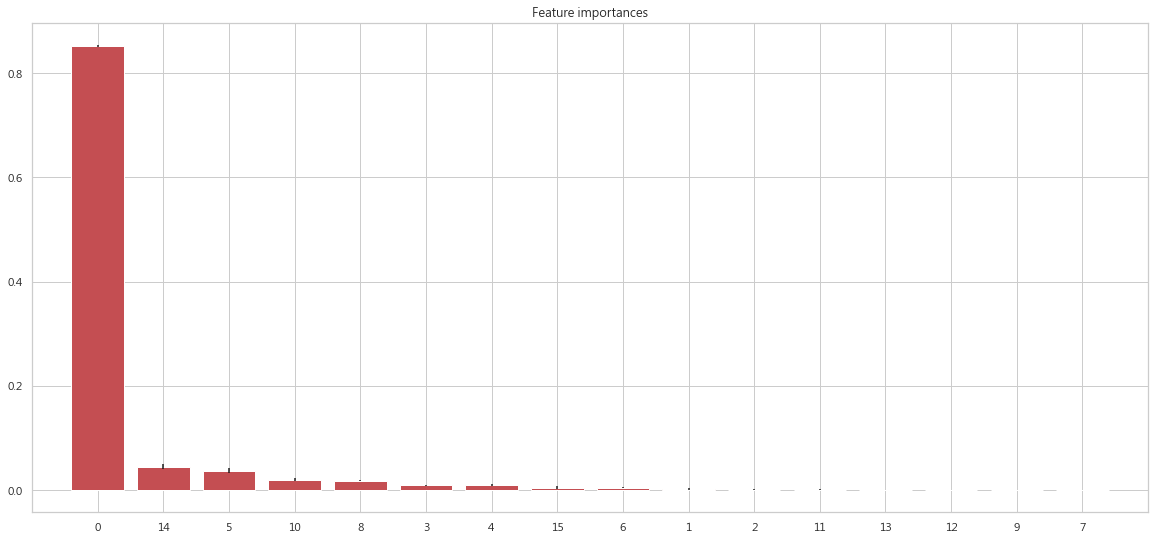

In [19]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,9))
plt.title("Feature importances")
n=16
_ = plt.bar(range(n), importance[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()